In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Defining the file paths
file_paths = {
    "causes_of_death": r"C:\Users\USER\Downloads\Infant Mortality Dataset\4. Distribution of Causes of Death among Children Aged less than 5 years.csv",
    "maternal_deaths": r"C:\Users\USER\Downloads\Infant Mortality Dataset\5. number-of-maternal-deaths-by-region.csv",
    "births_attended": r"C:\Users\USER\Downloads\Infant Mortality Dataset\6. births-attended-by-health-staff-sdgs.csv",
    "vaccination_coverage": r"C:\Users\USER\Downloads\Infant Mortality Dataset\7. global-vaccination-coverage.csv",
    "health_protection": r"C:\Users\USER\Downloads\Infant Mortality Dataset\8. health-protection-coverage.csv",
    "youth_mortality": r"C:\Users\USER\Downloads\Infant Mortality Dataset\1. youth-mortality-rate.csv",
    "infant_deaths": r"C:\Users\USER\Downloads\Infant Mortality Dataset\2. number-of-infant-deaths-unwpp.csv",
    "child_mortality": r"C:\Users\USER\Downloads\Infant Mortality Dataset\3. child-mortality-by-income-level-of-country.csv"
}

# Importing necessary library
import pandas as pd

# Loading the datasets into DataFrames
try:
    causes_of_death = pd.read_csv(file_paths["causes_of_death"])
    maternal_deaths = pd.read_csv(file_paths["maternal_deaths"])    
    births_attended = pd.read_csv(file_paths["births_attended"])
    vaccination_coverage = pd.read_csv(file_paths["vaccination_coverage"])
    health_protection = pd.read_csv(file_paths["health_protection"])
    youth_mortality = pd.read_csv(file_paths["youth_mortality"])
    infant_deaths = pd.read_csv(file_paths["infant_deaths"])
    child_mortality = pd.read_csv(file_paths["child_mortality"])
    
    # Confirming that the files are loaded successfully
    print("All datasets loaded successfully!")
except Exception as e:
    print("An error occurred while loading the datasets:", e)

All datasets loaded successfully!


In [16]:
# Storing the loaded datasets in a dictionary for easy iteration
datasets = {
    "Causes of Death": causes_of_death,
    "Maternal Deaths": maternal_deaths,
    "Births Attended": births_attended,
    "Vaccination Coverage": vaccination_coverage,
    "Health Protection": health_protection,
    "Youth Mortality": youth_mortality,
    "Infant Deaths": infant_deaths,
    "Child Mortality": child_mortality
}

# Looping through each dataset
for name, df in datasets.items():
    print(f"Dataset: {name}")
    print("=" * 40)
    
    # Display first few rows
    print("First few rows:")
    print(df.head())
    print("\n")
    
    # Display info
    print("Info:")
    print(df.info())
    print("\n")
    
    # Display summary statistics
    print("Summary Statistics:")
    print(df.describe(include="all"))  # include='all' for non-numerical data as well
    print("\n")
    
    print("#" * 60)  # Separator for clarity

Dataset: Causes of Death
First few rows:
  IndicatorCode                                          Indicator ValueType  \
0      MORT_300  Distribution of causes of death among children...   numeric   
1      MORT_300  Distribution of causes of death among children...   numeric   
2      MORT_300  Distribution of causes of death among children...   numeric   
3      MORT_300  Distribution of causes of death among children...   numeric   
4      MORT_300  Distribution of causes of death among children...   numeric   

  ParentLocationCode         ParentLocation Location type SpatialDimValueCode  \
0                EMR  Eastern Mediterranean       Country                 AFG   
1                EMR  Eastern Mediterranean       Country                 AFG   
2                EMR  Eastern Mediterranean       Country                 AFG   
3                EMR  Eastern Mediterranean       Country                 AFG   
4                EMR  Eastern Mediterranean       Country                

In [20]:
# List of all datasets
datasets = [causes_of_death, maternal_deaths, births_attended, vaccination_coverage, 
            health_protection, youth_mortality, infant_deaths, child_mortality]

# Names for the datasets (for printing purposes)
dataset_names = ["causes_of_death", "maternal_deaths", "births_attended", "vaccination_coverage", 
                 "health_protection", "youth_mortality", "infant_deaths", "child_mortality"]

# Checking for missing values in each dataset
for dataset_name, dataset in zip(dataset_names, datasets):
    print(f"Dataset: {dataset_name}")
    print(dataset.isnull().sum())  # Number of missing values per column
    print(dataset.isnull().mean() * 100)  # Percentage of missing values per column
    print("\n" + "="*40 + "\n")


Dataset: causes_of_death
IndicatorCode                      0
Indicator                          0
ValueType                          0
ParentLocationCode                 0
ParentLocation                     0
Location type                      0
SpatialDimValueCode                0
Location                           0
Period type                        0
Period                             0
IsLatestYear                       0
Dim1 type                          0
Dim1                               0
Dim1ValueCode                      0
Dim2 type                          0
Dim2                               0
Dim2ValueCode                      0
Dim3 type                     146664
Dim3                          146664
Dim3ValueCode                 146664
DataSourceDimValueCode        146664
DataSource                    146664
FactValueNumericPrefix        146664
FactValueNumeric                   0
FactValueUoM                  146664
FactValueNumericLowPrefix     146664
FactValueNume

In [26]:
# Checking the column names for 'causes_of_death' and other datasets
print(causes_of_death.columns)
# Checking the column names and first few rows of the 'causes_of_death' dataset
print(causes_of_death.columns)
print(causes_of_death.head())


Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1',
       'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type',
       'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource',
       'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM',
       'FactValueNumericLowPrefix', 'FactValueNumericLow',
       'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value',
       'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'],
      dtype='object')
Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1',
       'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type',
       'Dim3', 'Dim3ValueCode', 'DataSourceD

In [35]:
def impute_missing_values(dataset, year_column='Year_of_Observation'):
    # Identifying numerical columns
    numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
    
    # Impute missing values with the year-wise median
    for col in numeric_columns:
        # Use .loc[] to avoid SettingWithCopyWarning
        dataset.loc[:, col] = dataset.groupby(year_column)[col].transform(lambda x: x.fillna(x.median()))
    
    return dataset


In [37]:
# Dropping irrelevant columns
def drop_irrelevant_columns(dataset, columns_to_drop):
    """
    This function takes a dataset and a list of columns to drop and removes them.
    """
    dataset = dataset.drop(columns=columns_to_drop, errors='ignore')  # 'ignore' ensures no error if the column doesn't exist
    return dataset

# List of irrelevant columns for each dataset
irrelevant_columns = {
    "causes_of_death": ["IndicatorCode", "FactValueTranslationID", "FactComments", "Language"],
    "maternal_deaths": ["Code", "Entity"],
    "births_attended": ["Code", "Entity"],
    "vaccination_coverage": ["Code", "Entity"],
    "health_protection": ["Code", "Entity"],
    "youth_mortality": ["Code", "Entity"],
    "infant_deaths": ["Code", "Entity"],
    "child_mortality": ["Code", "Entity"]
}

# Dropping irrelevant columns from each dataset
causes_of_death = drop_irrelevant_columns(causes_of_death, irrelevant_columns["causes_of_death"])
maternal_deaths = drop_irrelevant_columns(maternal_deaths, irrelevant_columns["maternal_deaths"])
births_attended = drop_irrelevant_columns(births_attended, irrelevant_columns["births_attended"])
vaccination_coverage = drop_irrelevant_columns(vaccination_coverage, irrelevant_columns["vaccination_coverage"])
health_protection = drop_irrelevant_columns(health_protection, irrelevant_columns["health_protection"])
youth_mortality = drop_irrelevant_columns(youth_mortality, irrelevant_columns["youth_mortality"])
infant_deaths = drop_irrelevant_columns(infant_deaths, irrelevant_columns["infant_deaths"])
child_mortality = drop_irrelevant_columns(child_mortality, irrelevant_columns["child_mortality"])

# Confirming the changes by checking the column names
print("Columns after dropping irrelevant ones:")
print(causes_of_death.columns)
print(maternal_deaths.columns)
print(births_attended.columns)
print(vaccination_coverage.columns)
print(health_protection.columns)
print(youth_mortality.columns)
print(infant_deaths.columns)
print(child_mortality.columns)


Columns after dropping irrelevant ones:
Index(['Indicator', 'ValueType', 'ParentLocationCode', 'ParentLocation',
       'Location type', 'SpatialDimValueCode', 'Location', 'Period type',
       'Period', 'IsLatestYear', 'Dim1 type', 'Dim1', 'Dim1ValueCode',
       'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type', 'Dim3',
       'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource',
       'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM',
       'FactValueNumericLowPrefix', 'FactValueNumericLow',
       'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value',
       'DateModified'],
      dtype='object')
Index(['Year', 'Estimated maternal deaths', '959828-annotations'], dtype='object')
Index(['Year', 'Births attended by skilled health staff (% of total)'], dtype='object')
Index(['Year', 'BCG (% of one-year-olds immunized)',
       'HepB3 (% of one-year-olds immunized)',
       'Hib3 (% of one-year-olds immunized)',
       'IPV1 (% of one-year-olds immunized)',
     

In [59]:
# Stripping all column names of leading/trailing whitespaces
causes_of_death.columns = causes_of_death.columns.str.strip()
maternal_deaths.columns = maternal_deaths.columns.str.strip()
births_attended.columns = births_attended.columns.str.strip()
vaccination_coverage.columns = vaccination_coverage.columns.str.strip()
health_protection.columns = health_protection.columns.str.strip()
youth_mortality.columns = youth_mortality.columns.str.strip()
infant_deaths.columns = infant_deaths.columns.str.strip()
child_mortality.columns = child_mortality.columns.str.strip()

# Confirming that the column names are clean
for dataset_name, dataset in globals().items():
    if isinstance(dataset, pd.DataFrame):
        print(f"Columns in {dataset_name}: {dataset.columns.tolist()}")


Columns in causes_of_death: ['Indicator', 'ValueType', 'ParentLocationCode', 'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location', 'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1', 'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type', 'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource', 'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM', 'FactValueNumericLowPrefix', 'FactValueNumericLow', 'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value', 'DateModified']
Columns in maternal_deaths: ['Year', 'Estimated maternal deaths', '959828-annotations']
Columns in births_attended: ['Year', 'Births attended by skilled health staff (% of total)']
Columns in vaccination_coverage: ['Year', 'BCG (% of one-year-olds immunized)', 'HepB3 (% of one-year-olds immunized)', 'Hib3 (% of one-year-olds immunized)', 'IPV1 (% of one-year-olds immunized)', 'MCV1 (% of one-year-olds immunized)', 'PCV3 (% of one-year-olds immunized)', 'Pol3 (%

In [85]:
# Renaming the column(s) to 'Entity' for consistency
causes_of_death.rename(columns={'Location': 'Entity'}, inplace=True, errors='ignore')
maternal_deaths.rename(columns={'CountryName': 'Entity'}, inplace=True, errors='ignore')
births_attended.rename(columns={'Country': 'Entity'}, inplace=True, errors='ignore')
vaccination_coverage.rename(columns={'Country': 'Entity'}, inplace=True, errors='ignore')
health_protection.rename(columns={'Country': 'Entity'}, inplace=True, errors='ignore')
youth_mortality.rename(columns={'Country': 'Entity'}, inplace=True, errors='ignore')
infant_deaths.rename(columns={'Country': 'Entity'}, inplace=True, errors='ignore')
child_mortality.rename(columns={'Country': 'Entity'}, inplace=True, errors='ignore')


In [91]:
# Function to merge datasets
def merge_datasets(left_df, right_df, left_key, right_key):
    """
    Merges two datasets on the specified columns.
    """
    merged_df = pd.merge(left_df, right_df, left_on=left_key, right_on=right_key, how='inner')
    return merged_df

# Merging the datasets 
merged_data = causes_of_death  

# Merging all datasets sequentially
datasets_to_merge = [
    maternal_deaths, births_attended, vaccination_coverage, health_protection,
    youth_mortality, infant_deaths, child_mortality
]

for dataset in datasets_to_merge:
    if 'Entity' in dataset.columns:
        merged_data = merge_datasets(merged_data, dataset, "Entity", "Entity")
    else:
        print(f"Skipping dataset as 'Entity' column is missing: {dataset.columns.tolist()}")

# Checking the final merged dataset
print(f"Merged data shape: {merged_data.shape}")
print(f"Columns in merged data: {merged_data.columns.tolist()}")


Skipping dataset as 'Entity' column is missing: ['Year', 'Estimated maternal deaths', '959828-annotations']
Skipping dataset as 'Entity' column is missing: ['Year', 'Births attended by skilled health staff (% of total)']
Skipping dataset as 'Entity' column is missing: ['Year', 'BCG (% of one-year-olds immunized)', 'HepB3 (% of one-year-olds immunized)', 'Hib3 (% of one-year-olds immunized)', 'IPV1 (% of one-year-olds immunized)', 'MCV1 (% of one-year-olds immunized)', 'PCV3 (% of one-year-olds immunized)', 'Pol3 (% of one-year-olds immunized)', 'RCV1 (% of one-year-olds immunized)', 'RotaC (% of one-year-olds immunized)', 'YFV (% of one-year-olds immunized)', 'DTP3 (% of one-year-olds immunized)']
Skipping dataset as 'Entity' column is missing: ['Year', 'Share of population covered by health insurance (ILO (2014))']
Skipping dataset as 'Entity' column is missing: ['Year', 'Under-fifteen mortality rate']
Skipping dataset as 'Entity' column is missing: ['Year', 'Deaths - Sex: all - Age: 

In [93]:
print(merged_data.head())  # Checking first few rows of the merged data


                                           Indicator ValueType  \
0  Distribution of causes of death among children...   numeric   
1  Distribution of causes of death among children...   numeric   
2  Distribution of causes of death among children...   numeric   
3  Distribution of causes of death among children...   numeric   
4  Distribution of causes of death among children...   numeric   

  ParentLocationCode         ParentLocation Location type SpatialDimValueCode  \
0                EMR  Eastern Mediterranean       Country                 AFG   
1                EMR  Eastern Mediterranean       Country                 AFG   
2                EMR  Eastern Mediterranean       Country                 AFG   
3                EMR  Eastern Mediterranean       Country                 AFG   
4                EMR  Eastern Mediterranean       Country                 AFG   

        Entity Period type  Period  IsLatestYear  ... DataSource  \
0  Afghanistan        Year    2017          True

In [95]:
merged_data = merged_data.drop_duplicates()


In [97]:
print(merged_data.isnull().sum())  # Checking for missing values


Indicator                        0
ValueType                        0
ParentLocationCode               0
ParentLocation                   0
Location type                    0
SpatialDimValueCode              0
Entity                           0
Period type                      0
Period                           0
IsLatestYear                     0
Dim1 type                        0
Dim1                             0
Dim1ValueCode                    0
Dim2 type                        0
Dim2                             0
Dim2ValueCode                    0
Dim3 type                     8148
Dim3                          8148
Dim3ValueCode                 8148
DataSourceDimValueCode        8148
DataSource                    8148
FactValueNumericPrefix        8148
FactValueNumeric                 0
FactValueUoM                  8148
FactValueNumericLowPrefix     8148
FactValueNumericLow           8148
FactValueNumericHighPrefix    8148
FactValueNumericHigh          8148
Value               

In [116]:
# Saving the merged dataset to a CSV file
merged_data.to_csv('final_merged_data.csv', index=False)
print("Merged dataset saved successfully as 'final_merged_data.csv'!")

Merged dataset saved successfully as 'final_merged_data.csv'!


In [118]:
import os
print("Files in current directory:", os.listdir())

Files in current directory: ['.ipynb_checkpoints', 'ADAM.bak', 'ADAM.dwg', 'ADESEUN TAIWO NIMOTA AdmissionLetter.pdf', 'BingWallpaper.exe', 'ChromeSetup.exe', 'desktop.ini', 'final_merged_data.csv', 'final_merged_data.csv.ipynb', 'GoogleEarthProSetup.exe', 'gym members group project CODE (1).ipynb', 'gym members group project CODE (2).ipynb', 'gym members group project CODE.ipynb', 'gym members project (1).docx', 'gym members project.docx', 'ijerph-03-00098.pdf', 'Infant Mortality Dataset', 'Infant Mortality Dataset.zip', 'last project.docx', 'MY BABY ADMISSION LETTER.pdf', 'Odunfa Post Filed_ Edited by Grace (25 Nov 2024) (1).pptx', 'Odunfa Post Filed_ Edited by Grace (25 Nov 2024) (2).pptx', 'Odunfa Post Filed_ Edited by Grace (25 Nov 2024) (3).pptx', 'Odunfa Post Filed_ Edited by Grace (25 Nov 2024) (4).pptx', 'Odunfa Post Filed_ Edited by Grace (25 Nov 2024).pptx', 'qrcode_docs.google.com.png', 'record.ogg', 'regonet_project (1).csv', 'regonet_project.csv', 's44223-024-00067-y.pdf'

In [120]:
# To load the saved merged dataset
merged_data = pd.read_csv('final_merged_data.csv')
print("Merged dataset reloaded successfully!")

Merged dataset reloaded successfully!


In [122]:
# Load the saved dataset
merged_data = pd.read_csv('final_merged_data.csv')

# Display basic information about the dataset
print("Dataset Info:")
merged_data.info()

# Show the first few rows of the dataset
print("First few rows of the dataset:")
merged_data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8148 entries, 0 to 8147
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Indicator                   8148 non-null   object 
 1   ValueType                   8148 non-null   object 
 2   ParentLocationCode          8148 non-null   object 
 3   ParentLocation              8148 non-null   object 
 4   Location type               8148 non-null   object 
 5   SpatialDimValueCode         8148 non-null   object 
 6   Entity                      8148 non-null   object 
 7   Period type                 8148 non-null   object 
 8   Period                      8148 non-null   int64  
 9   IsLatestYear                8148 non-null   bool   
 10  Dim1 type                   8148 non-null   object 
 11  Dim1                        8148 non-null   object 
 12  Dim1ValueCode               8148 non-null   object 
 13  Dim2 type          

,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Entity,Period type,Period,IsLatestYear,...,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,DateModified,Year
0,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,True,...,NaN,0.0006,NaN,NaN,NaN,NaN,NaN,0.0,2018-11-26T23:00:00.000Z,True
1,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,True,...,NaN,0.0110,NaN,NaN,NaN,NaN,NaN,0.0,2018-11-26T23:00:00.000Z,True
2,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,True,...,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,0.0,2018-11-26T23:00:00.000Z,True
3,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,True,...,NaN,0.0110,NaN,NaN,NaN,NaN,NaN,0.0,2018-11-26T23:00:00.000Z,True
4,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,True,...,NaN,0.0270,NaN,NaN,NaN,NaN,NaN,0.0,2018-11-26T23:00:00.000Z,True


In [124]:
# Checking for missing values
print("Missing Values Summary:")
print(merged_data.isnull().sum())

# Handling missing values if any
merged_data.fillna(merged_data.median(numeric_only=True), inplace=True)

Missing Values Summary:
Indicator                        0
ValueType                        0
ParentLocationCode               0
ParentLocation                   0
Location type                    0
SpatialDimValueCode              0
Entity                           0
Period type                      0
Period                           0
IsLatestYear                     0
Dim1 type                        0
Dim1                             0
Dim1ValueCode                    0
Dim2 type                        0
Dim2                             0
Dim2ValueCode                    0
Dim3 type                     8148
Dim3                          8148
Dim3ValueCode                 8148
DataSourceDimValueCode        8148
DataSource                    8148
FactValueNumericPrefix        8148
FactValueNumeric                 0
FactValueUoM                  8148
FactValueNumericLowPrefix     8148
FactValueNumericLow           8148
FactValueNumericHighPrefix    8148
FactValueNumericHigh          8

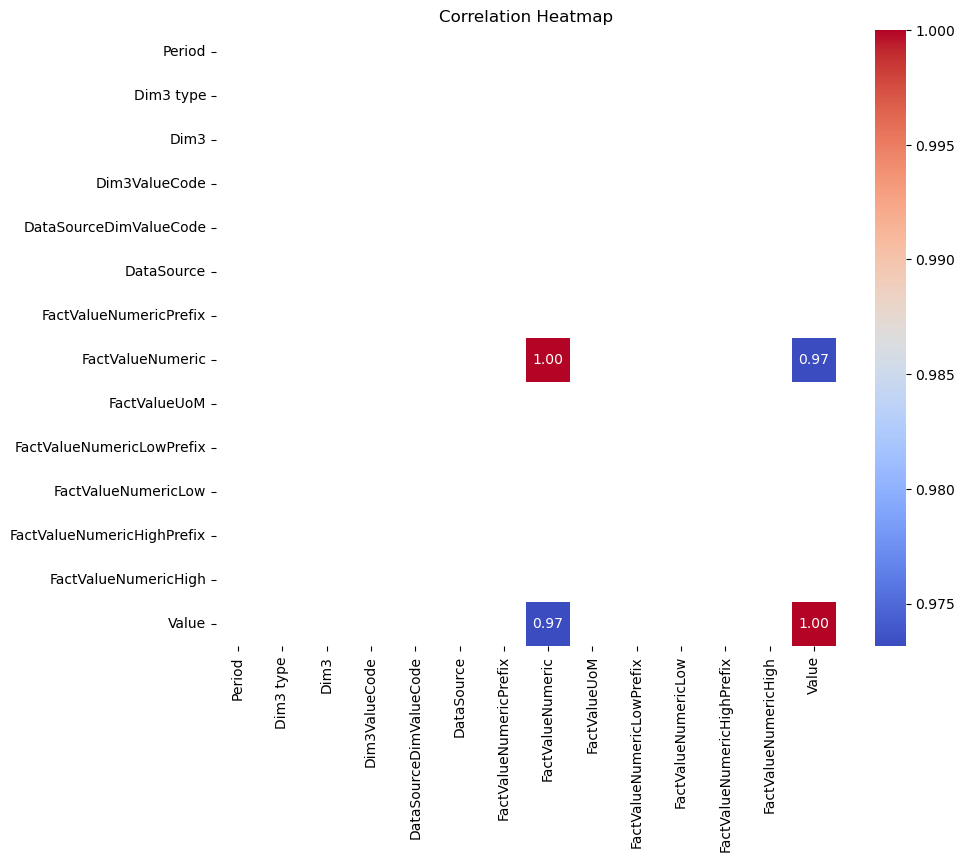

In [130]:
# Select only numerical columns
numerical_columns = merged_data.select_dtypes(include=['number'])

# Check if there are enough numerical columns for correlation
if not numerical_columns.empty:
    # Generate the correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No numerical columns found for correlation analysis.")


In [2]:
# Loading the merged dataset
import pandas as pd

# Load the dataset
merged_data = pd.read_csv('final_merged_data.csv')

# Displaying basic information
print("Dataset Info:")
print(merged_data.info())

# Displaying the first few rows to understand the data
print("\nPreview of Dataset:")
print(merged_data.head())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(merged_data.describe(include='all'))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Indicator                   8148 non-null   object 
 1   ValueType                   8148 non-null   object 
 2   ParentLocationCode          8148 non-null   object 
 3   ParentLocation              8148 non-null   object 
 4   Location type               8148 non-null   object 
 5   SpatialDimValueCode         8148 non-null   object 
 6   Entity                      8148 non-null   object 
 7   Period type                 8148 non-null   object 
 8   Period                      8148 non-null   float64
 9   IsLatestYear                8148 non-null   object 
 10  Dim1 type                   8148 non-null   object 
 11  Dim1                        8148 non-null   object 
 12  Dim1ValueCode               8148 non-null   object 
 13  Dim2 type        

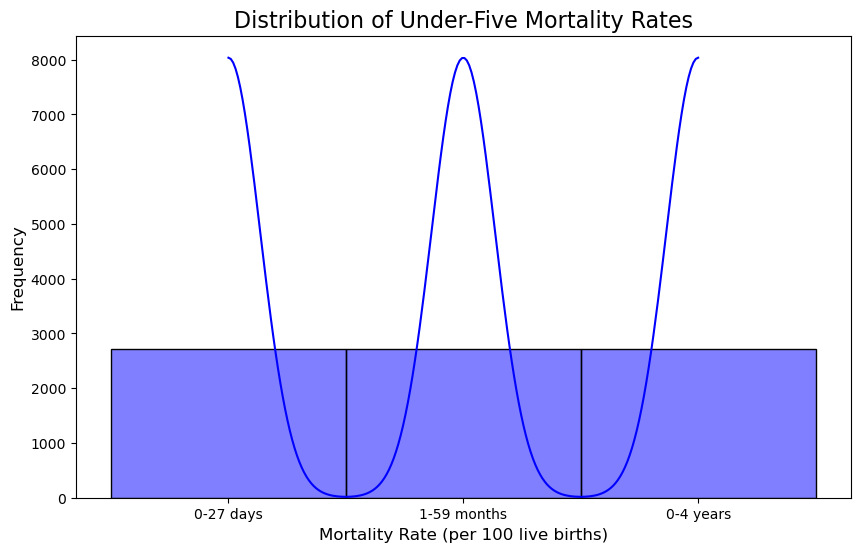

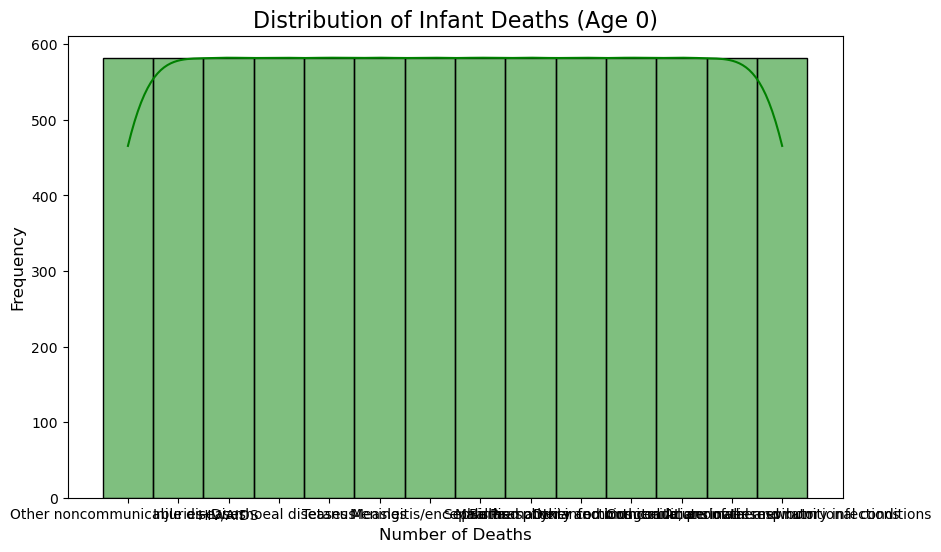

In [25]:
#Understand Mortality Distribution --- objective 1
# Rename 'Dim1' to 'Under-five mortality rate'
merged_data.rename(columns={'Dim1': 'Under-five mortality rate'}, inplace=True)
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of under-five mortality rates
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Under-five mortality rate'], kde=True, color='blue', bins=30)
plt.title('Distribution of Under-Five Mortality Rates', fontsize=16)
plt.xlabel('Mortality Rate (per 100 live births)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Rename Dim2 to 'Deaths - Sex: all - Age: 0'
merged_data.rename(columns={'Dim2': 'Deaths - Sex: all - Age: 0'}, inplace=True)
# Visualize distribution of infant deaths
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Deaths - Sex: all - Age: 0'], kde=True, color='green', bins=30)
plt.title('Distribution of Infant Deaths (Age 0)', fontsize=16)
plt.xlabel('Number of Deaths', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

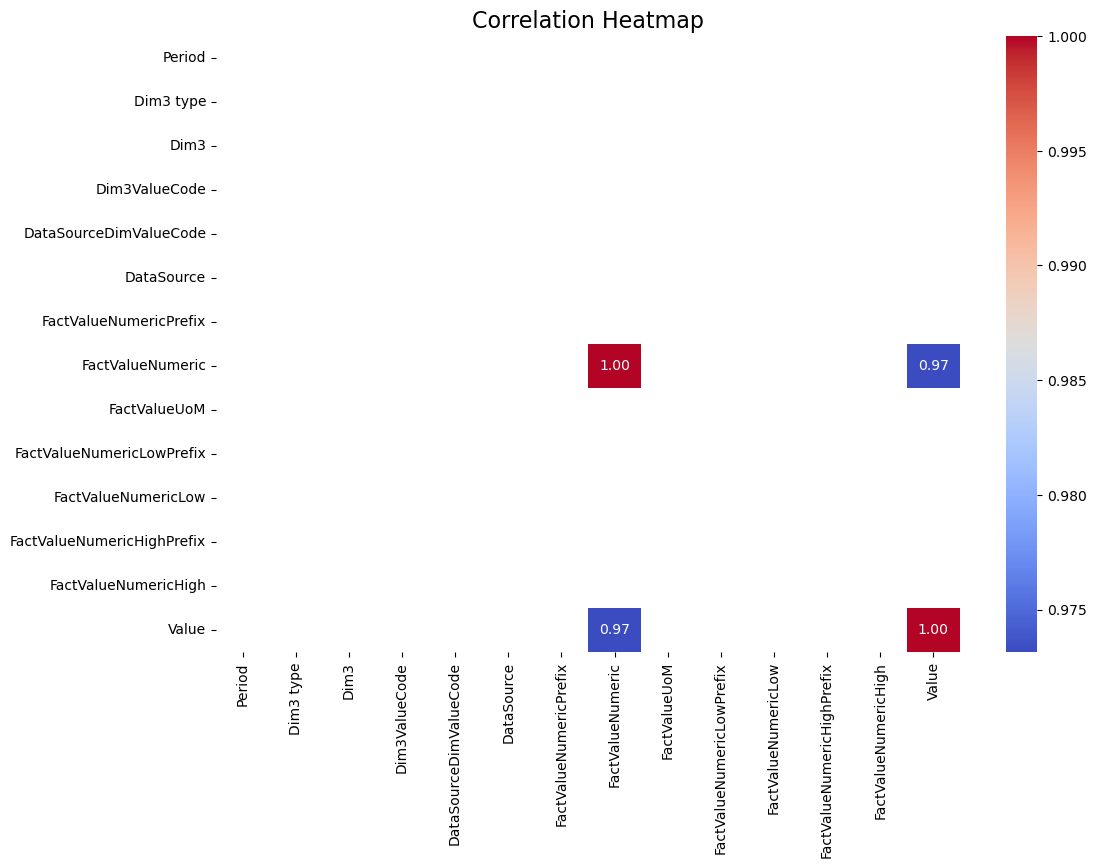

In [13]:
#Correlation Analysis ---- Objective 2 (Correlation Analysis)
# Selecting only numeric columns for correlation analysis
numeric_data = merged_data.select_dtypes(include=['number'])

# Computimg the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [7]:
# Reloading the previously saved merged dataset
merged_data = pd.read_csv('final_merged_data.csv')
print("Merged dataset reloaded successfully!")

# Checking the first few rows to confirm
print(merged_data.head())


Merged dataset reloaded successfully!
                                           Indicator ValueType  \
0  Distribution of causes of death among children...   numeric   
1  Distribution of causes of death among children...   numeric   
2  Distribution of causes of death among children...   numeric   
3  Distribution of causes of death among children...   numeric   
4  Distribution of causes of death among children...   numeric   

  ParentLocationCode         ParentLocation Location type SpatialDimValueCode  \
0                EMR  Eastern Mediterranean       Country                 AFG   
1                EMR  Eastern Mediterranean       Country                 AFG   
2                EMR  Eastern Mediterranean       Country                 AFG   
3                EMR  Eastern Mediterranean       Country                 AFG   
4                EMR  Eastern Mediterranean       Country                 AFG   

        Entity Period type  Period  IsLatestYear  ... FactValueNumericPrefix  

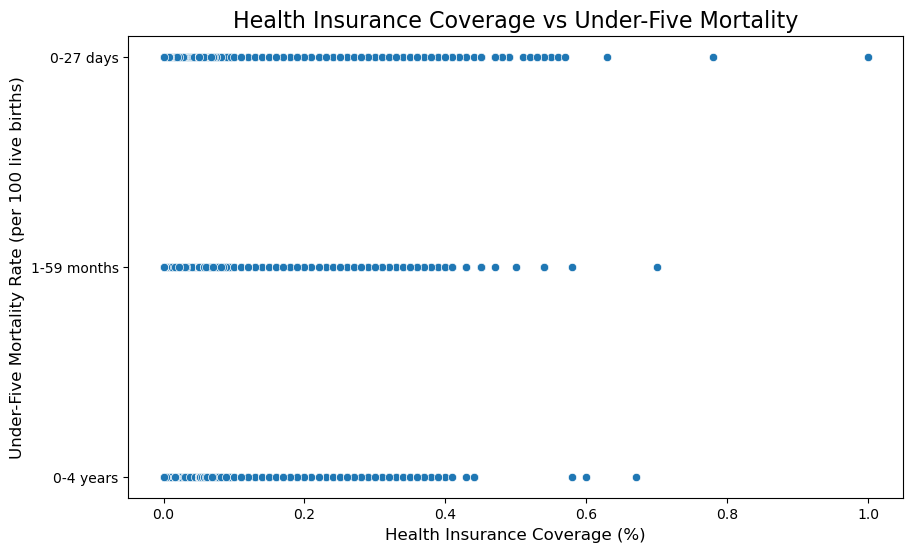

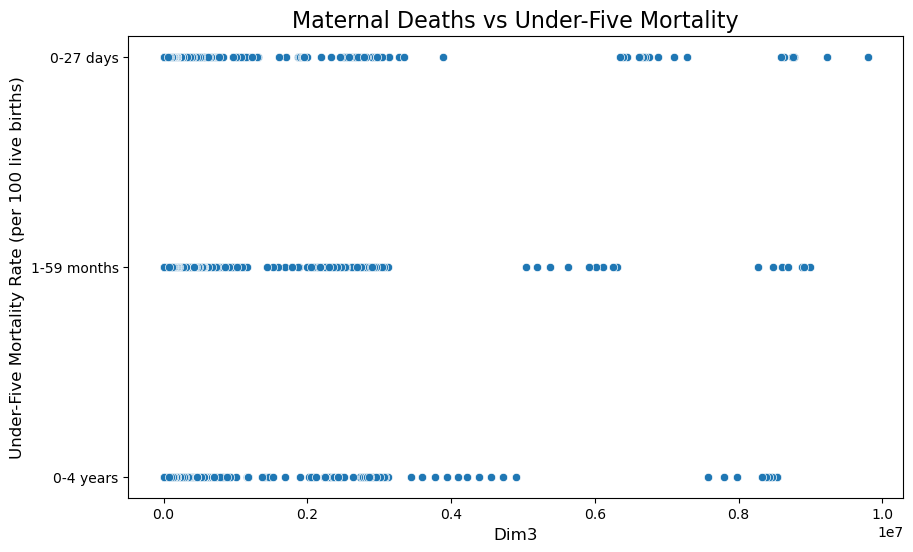

In [27]:
#Investigate Key Drivers ---- 0bjective 3
# Comparing mortality with health protection coverage
# Rename 'Dim1' to 'Under-five mortality rate'
merged_data.rename(columns={'Dim1': 'Under-five mortality rate'}, inplace=True)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FactValueNumeric', 
                y='Under-five mortality rate', 
                data=merged_data)
plt.title('Health Insurance Coverage vs Under-Five Mortality', fontsize=16)
plt.xlabel('Health Insurance Coverage (%)', fontsize=12)
plt.ylabel('Under-Five Mortality Rate (per 100 live births)', fontsize=12)
plt.show()

# Compare mortality with maternal deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dim3', 
                y='Under-five mortality rate', 
                data=merged_data)
plt.title('Maternal Deaths vs Under-Five Mortality', fontsize=16)
plt.xlabel('Dim3', fontsize=12)
plt.ylabel('Under-Five Mortality Rate (per 100 live births)', fontsize=12)
plt.show()


In [35]:
!pip install python-docx

In [39]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from docx import Document
# from docx.shared import Inches

# # Creating a new Document
# doc = Document()

# # --- Objective 1: Understand Mortality Distribution ---
# doc.add_heading('Objective 1: Understand Mortality Distribution', level=1)

# # Rename 'Dim1' to 'Under-five mortality rate'
# merged_data.rename(columns={'Dim1': 'Under-five mortality rate'}, inplace=True)

# # Visualize distribution of under-five mortality rates
# plt.figure(figsize=(10, 6))
# sns.histplot(merged_data['Under-five mortality rate'], kde=True, color='blue', bins=30)
# plt.title('Distribution of Under-Five Mortality Rates')
# plt.xlabel('Mortality Rate (per 100 live births)', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.savefig('under_five_mortality_distribution.png')  # Save the plot
# plt.close()

# # Adding image to Word document
# doc.add_paragraph('Figure 1: Distribution of Under-Five Mortality Rates')
# doc.add_picture('under_five_mortality_distribution.png', width=Inches(5.0))

# # Rename Dim2 to 'Deaths - Sex: all - Age: 0'
# merged_data.rename(columns={'Dim2': 'Deaths - Sex: all - Age: 0'}, inplace=True)

# # Visualize distribution of infant deaths
# plt.figure(figsize=(10, 6))
# sns.histplot(merged_data['Deaths - Sex: all - Age: 0'], kde=True, color='green', bins=30)
# plt.title('Distribution of Infant Deaths (Age 0)')
# plt.xlabel('Number of Deaths', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.savefig('infant_deaths_distribution.png')  # Save the plot
# plt.close()

# # Adding image to Word document
# doc.add_paragraph('Figure 2: Distribution of Infant Deaths (Age 0)')
# doc.add_picture('infant_deaths_distribution.png', width=Inches(5.0))

# # --- Objective 2: Correlation Analysis ---
# doc.add_heading('Objective 2: Correlation Analysis', level=1)

# # Select only numeric columns for correlation analysis
# numeric_data = merged_data.select_dtypes(include=['number'])

# # Compute the correlation matrix
# correlation_matrix = numeric_data.corr()

# # Plot the correlation heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Heatmap')
# plt.savefig('correlation_heatmap.png')  # Save the plot
# plt.close()

# # Add image to Word document
# doc.add_paragraph('Figure 3: Correlation Heatmap')
# doc.add_picture('correlation_heatmap.png', width=Inches(5.0))

# # --- Objective 3: Investigate Key Drivers ---
# doc.add_heading('Objective 3: Investigate Key Drivers', level=1)

# # Compare mortality with health insurance coverage
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='FactValueNumeric', 
#                 y='Under-five mortality rate', 
#                 data=merged_data)
# plt.title('Health Insurance Coverage vs Under-Five Mortality')
# plt.xlabel('Health Insurance Coverage (%)', fontsize=12)
# plt.ylabel('Under-Five Mortality Rate (per 100 live births)', fontsize=12)
# plt.savefig('health_insurance_vs_mortality.png')  # Save the plot
# plt.close()

# # Add image to Word document
# doc.add_paragraph('Figure 4: Health Insurance Coverage vs Under-Five Mortality')
# doc.add_picture('health_insurance_vs_mortality.png', width=Inches(5.0))

# # Compare mortality with maternal deaths
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Dim3', 
#                 y='Under-five mortality rate', 
#                 data=merged_data)
# plt.title('Maternal Deaths vs Under-Five Mortality')
# plt.xlabel('Maternal Deaths', fontsize=12)
# plt.ylabel('Under-Five Mortality Rate (per 100 live births)', fontsize=12)
# plt.savefig('maternal_deaths_vs_mortality.png')  # Save the plot
# plt.close()

# # Add image to Word document
# doc.add_paragraph('Figure 5: Maternal Deaths vs Under-Five Mortality')
# doc.add_picture('maternal_deaths_vs_mortality.png', width=Inches(5.0))

# # Saving the document
# doc.save('mortality_analysis_report.docx')

# print("Report generated successfully as 'mortality_analysis_report.docx' with images.")


Report generated successfully as 'mortality_analysis_report.docx' with images.
